<a href="https://colab.research.google.com/github/RaisB17/deep_learning/blob/main/week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_auc_score, roc_curve, f1_score, recall_score, precision_score, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.preprocessing import label_binarize
from itertools import cycle
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

# Tensorflow

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

In [ ]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
cnn_model.fit(x_train, y_train, epochs=15, validation_split=0.1, batch_size=64)

Epoch 1/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 64s 86ms/step - accuracy: 0.2540 - loss: 1.9745 - val_accuracy: 0.4850 - val_loss: 1.4252
Epoch 2/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.4924 - loss: 1.4075 - val_accuracy: 0.5374 - val_loss: 1.2672
Epoch 3/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 79s 83ms/step - accuracy: 0.5597 - loss: 1.2429 - val_accuracy: 0.6254 - val_loss: 1.0562
Epoch 4/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 84s 86ms/step - accuracy: 0.5988 - loss: 1.1313 - val_accuracy: 0.6406 - val_loss: 1.0123
Epoch 5/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.6335 - loss: 1.0429 - val_accuracy: 0.6510 - val_loss: 0.9895
Epoch 6/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.6609 - loss: 0.9624 - val_accuracy: 0.6780 - val_loss: 0.9225
Epoch 7/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 59s 84ms/step - accuracy: 0.6860 - loss: 0.9003 - val_accuracy: 0.6866 - val_loss: 0.9187
Epoch 8/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 84s 87ms/step - accuracy: 0.7011 - loss: 0.8577 - 

In [ ]:
y_pred_proba = cnn_model.predict(x_test)
y_pred = np.argmax(y_pred_proba, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [ ]:
print("\nCNN TensorFlow CIFAR-10 Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))


CNN TensorFlow CIFAR-10 Evaluation:
Accuracy: 0.72
Precision: 0.725378968844078
Recall: 0.7200000000000001
F1 Score: 0.7193329723070748


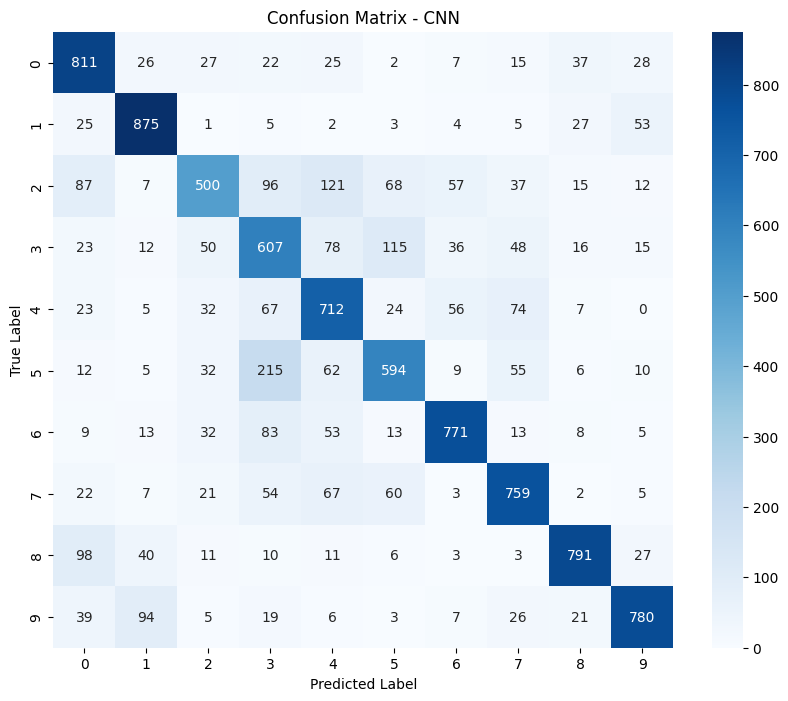

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - CNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

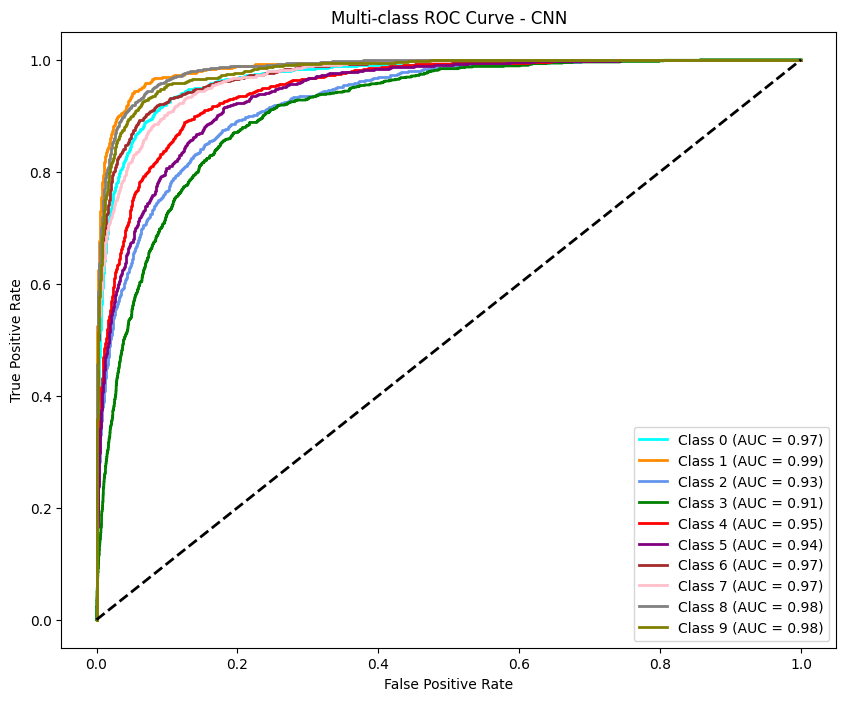

In [ ]:
n_classes = 10
y_test_bin = label_binarize(y_test, classes=list(range(n_classes)))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive'])
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve - CNN')
plt.legend(loc='lower right')
plt.show()

# Pytorch

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.09MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 132kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.64MB/s]


In [3]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [4]:
for epoch in range(10):
    running_loss = 0.0
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}")

Epoch 1, Loss: 0.3401
Epoch 2, Loss: 0.1533
Epoch 3, Loss: 0.1111
Epoch 4, Loss: 0.0913
Epoch 5, Loss: 0.0769
Epoch 6, Loss: 0.0682
Epoch 7, Loss: 0.0583
Epoch 8, Loss: 0.0553
Epoch 9, Loss: 0.0485
Epoch 10, Loss: 0.0440



MLP PyTorch MNIST Evaluation:
Accuracy: 0.9731
Precision: 0.9729044901053132
Recall: 0.9731026538464448
F1 Score: 0.972886076114562


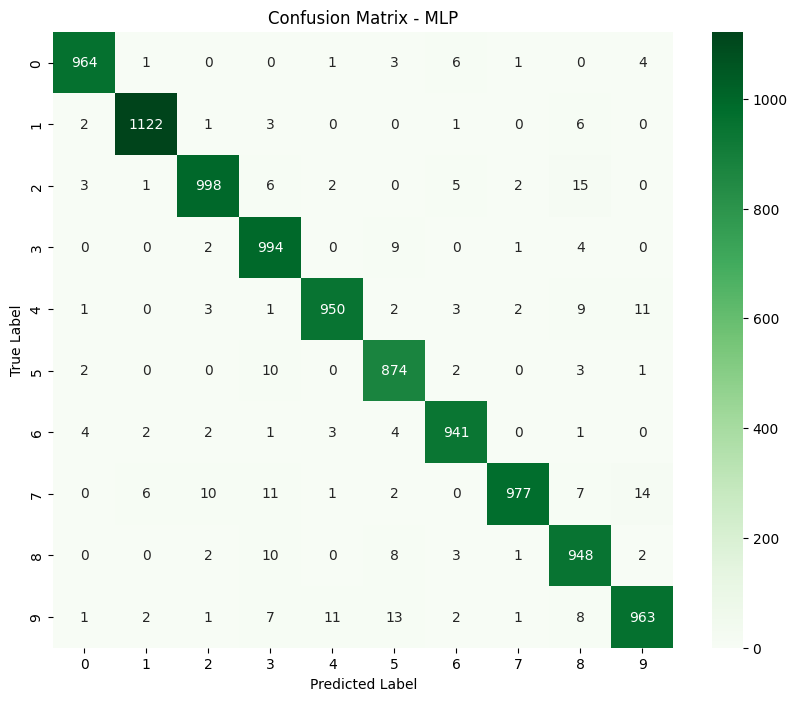

In [7]:
correct = 0
total = 0
all_preds = []
all_labels = []
model.eval()
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

print("\nMLP PyTorch MNIST Evaluation:")
print("Accuracy:", accuracy_score(all_labels, all_preds))
print("Precision:", precision_score(all_labels, all_preds, average='macro'))
print("Recall:", recall_score(all_labels, all_preds, average='macro'))
print("F1 Score:", f1_score(all_labels, all_preds, average='macro'))

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(all_labels, all_preds), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - MLP')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()